In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from models.autoencoder import AE
import torch
from datasets.video_dataset import VideoDataset
import os
import pickle
from tqdm import tqdm

In [3]:
device = torch.device('cpu')
net = AE()
net.load_state_dict(torch.load('src/ae_epoch_19_loss_0.04.pt'))
net.eval()

AE(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (1): Hardswish()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): Hardswish()
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): Hardswish()
    (2): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): Hardswish()
    (4): ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (5): Tanh()
  )
)

In [23]:
dataset = VideoDataset(r'E:\Gait\dataset', txt_list_file='src/train.txt', img_size=112, vid_len=40)
print(len(dataset))

15849


In [11]:
criteron = torch.nn.MSELoss()
loss_means = []

with torch.no_grad():
    for i in tqdm(range(len(dataset))):
        vid, target = dataset.__getitem__(i)
        # print(vid[0].shape)
        gei = np.zeros((112, 112))
        features = []
        for frame in  vid:

            out = net(frame.unsqueeze(0))
            loss = criteron(frame.unsqueeze(0), out)
            loss_means.append(loss.numpy().tolist())
            # print(out.shape)
            # plt.imshow(out[0][0])
            # plt.show()
            # plt.imshow(frame[0])
            # plt.show()
            # break
        if i >= 100:
            break
print(sum(loss_means)/len(loss_means))
print(len(loss_means))


  1%|          | 100/15849 [00:06<17:37, 14.89it/s]

0.04204204626505881
4040


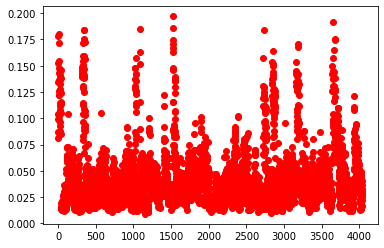

In [13]:
plt.plot(loss_means, 'ro')

In [15]:
print(min(loss_means), max(loss_means))

0.00902022235095501 0.19704005122184753


In [22]:
print(len([i for i in loss_means if 0.9>i>0.2]))

0
